<a href="https://colab.research.google.com/github/Malbasahi/American-Sign-Language-Recognition-using-Convolutional-Neural-Networks/blob/main/Cricket_Player_Performance_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [349]:
# Load the datasets
odi_all_round = pd.read_csv('ODI_all_round.csv')
odi_batting = pd.read_csv('ODI_batting.csv')
odi_bowling = pd.read_csv('ODI_bowling.csv')
all_players = pd.read_csv('all_players.csv')
country = pd.read_csv('country.csv')
fielding = pd.read_csv('fielding.csv')
t20_all_round = pd.read_csv('t20_all_round.csv')
t20_batting = pd.read_csv('t20_batting.csv')
t20_bowling = pd.read_csv('t20_bowling.csv')

In [350]:
# Merge relevant datasets based on Player_ID
odi_data = pd.merge(all_players, odi_batting, on='id')
odi_data = pd.merge(odi_data, odi_bowling, on='id')
odi_data = pd.merge(odi_data, odi_all_round, on='id')

In [351]:
odi_data

,id,name,gender,bating_style,bowling_style,playing_role,country_id,span,matches,innings,...,bwa_y,ct,fw_y,hn,hs,pr_y,rn,st,wk_y,sp_y
0,935995,Afif Hossain,M,left-hand bat,right-arm offbreak,allrounder,25,2020-2022,22,19.0,...,22.66,9,0.0,0.0,93*,NaN,495.0,0,3.0,2020-2022
1,380354,Anamul Haque,M,right-hand bat,NaN,wicketkeeper batter,25,2012-2022,44,41.0,...,NaN,12,NaN,3.0,120,NaN,1254.0,0,NaN,2012-2022
2,932355,Ebadot Hossain,M,right-hand bat,right-arm fast-medium,bowler,25,2022-2022,4,3.0,...,19.09,1,0.0,0.0,0*,NaN,0.0,0,11.0,2022-2022
3,926629,Hasan Mahmud,M,right-hand bat,right-arm medium,bowler,25,2021-2022,6,3.0,...,32.00,0,0.0,0.0,1,NaN,1.0,0,8.0,2021-2022
4,536936,Litton Das,M,right-hand bat,right-arm offbreak,wicketkeeper batter,25,2015-2022,60,60.0,...,NaN,40,NaN,5.0,176,NaN,1912.0,3,NaN,2015-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,337790,HE van der Dussen,M,right-hand bat,legbreak,top-order batter,3,2019-2023,41,35.0,...,3.00,17,0.0,4.0,134,NaN,1679.0,0,1.0,2019-2023
343,595004,K Verreynne,M,right-hand bat,right-arm offbreak,wicketkeeper batter,3,2020-2022,12,10.0,...,NaN,9,NaN,0.0,95,NaN,371.0,0,NaN,2020-2022
344,379887,LB Williams,M,left-hand bat,right-arm medium-fast,bowler,3,NaN,1,NaN,...,62.00,0,0.0,NaN,NaN,NaN,NaN,0,1.0,2021-2021
345,318842,K Zondo,M,right-hand bat,right-arm offbreak,batter,3,2018-2021,6,6.0,...,NaN,1,NaN,0.0,54,NaN,146.0,0,NaN,2018-2021


In [352]:
# Select the relevant features
selected_features = [
    'name', 'gender', 'bating_style', 'bowling_style', 'playing_role',
    'matches', 'innings', 'not_out', 'runs', 'high_score',
    'average_score', 'ball_faced', 'strike_rate', '100s', '50', '0s', '4s'
]

# Create a new DataFrame with only the selected features
selected_data = odi_data[selected_features]

In [353]:
# Filter the dataset based on selected features
odi_data = odi_data[selected_features + ['runs']]  # Include the 'runs' column

In [354]:
# Handle missing values if any
odi_data.fillna(0, inplace=True)

<ipython-input-354-316726dba1eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_data.fillna(0, inplace=True)


In [355]:
# Clean and preprocess the 'high_score' column
odi_data['high_score'] = odi_data['high_score'].str.replace('*', '').astype(float)

<ipython-input-355-e9fee6988dee>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  odi_data['high_score'] = odi_data['high_score'].str.replace('*', '').astype(float)
<ipython-input-355-e9fee6988dee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_data['high_score'] = odi_data['high_score'].str.replace('*', '').astype(float)


In [356]:
odi_data['high_score'] = odi_data['high_score'].astype(str)  # Convert to string if not already

# Now you can clean and preprocess the 'high_score' column
odi_data['high_score'] = odi_data['high_score'].str.extract('(\d+)').astype(float)

<ipython-input-356-ea26fee7c403>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_data['high_score'] = odi_data['high_score'].astype(str)  # Convert to string if not already
<ipython-input-356-ea26fee7c403>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_data['high_score'] = odi_data['high_score'].str.extract('(\d+)').astype(float)


In [357]:
odi_data.columns = odi_data.columns.str.strip()

In [358]:
print(odi_data.columns)

Index(['name', 'gender', 'bating_style', 'bowling_style', 'playing_role',
       'matches', 'innings', 'not_out', 'runs', 'high_score', 'average_score',
       'ball_faced', 'strike_rate', '100s', '50', '0s', '4s', 'runs'],
      dtype='object')


In [359]:
unique_high_scores = odi_data['high_score'].unique()
print(unique_high_scores)

[ 93. 120.   0.   1. 176.  14. 128. 100.  51.  60.  52. 144.  18.  38.
  45. 102.  15.   6.   2.  82.  97.  67. 162.  57.   9. 116. 104.  10.
  nan 127. 114.  96.  21. 118.   5.  22. 140. 124.  32. 138.  74.  19.
 237.  48.  25. 145.  36.  63.  68.  84.  16.   7.  79. 177. 113.  83.
  28.   8. 141.  80.  58.  95.  20.  61. 171.  66.  12.  59.  23.  99.
 130.  33.  46. 110.  42.  24.  72.  30.  17.  34.  31.  78. 101. 179.
  94. 139. 170.  49.  91. 134.  39. 158.  50.  11.   4. 106.   3. 153.
  89. 117. 152. 108. 210.  29. 151.  41.  53. 115.  65.  69. 143.  87.
 183.  92. 125. 148. 133. 180. 122.  55. 111.  75.  26. 119. 137. 178.
 123.  56.  64.  27. 112.  86. 264. 208. 129. 181.  37. 164. 146. 105.
 132.  54.]


In [360]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_columns = ['bating_style', 'bowling_style', 'playing_role']

label_encoders = {}
for column in categorical_columns:
    odi_data[column] = odi_data[column].astype(str)  # Convert the column to string type
    label_encoders[column] = LabelEncoder()
    odi_data[column] = label_encoders[column].fit_transform(odi_data[column])

<ipython-input-360-1ac94faf3f2c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_data[column] = odi_data[column].astype(str)  # Convert the column to string type
<ipython-input-360-1ac94faf3f2c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_data[column] = label_encoders[column].fit_transform(odi_data[column])
<ipython-input-360-1ac94faf3f2c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [361]:
# Remove rows with missing values in the 'runs' column
odi_data.dropna(subset=['runs'], inplace=True)

<ipython-input-361-bd23b031fcfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_data.dropna(subset=['runs'], inplace=True)


In [362]:
# Separate features (X) and target variable (y)
X = odi_data[selected_features]  # Use the same selected features for X
y = odi_data['runs']

In [363]:
# Ensure all values in 'high_score' are treated as strings
odi_data['high_score'] = odi_data['high_score'].astype(str)

<ipython-input-363-fd6418b2c789>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_data['high_score'] = odi_data['high_score'].astype(str)


In [364]:
# Remove asterisks (*) and convert 'high_score' to numeric
odi_data['high_score'] = odi_data['high_score'].str.replace('*', '').astype(float)

<ipython-input-364-e860612624b4>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  odi_data['high_score'] = odi_data['high_score'].str.replace('*', '').astype(float)
<ipython-input-364-e860612624b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_data['high_score'] = odi_data['high_score'].str.replace('*', '').astype(float)


In [365]:
# Check unique values in the 'high_score' column
unique_high_scores = odi_data['high_score'].unique()
print(unique_high_scores)

[ 93. 120.   0.   1. 176.  14. 128. 100.  51.  60.  52. 144.  18.  38.
  45. 102.  15.   6.   2.  82.  97.  67. 162.  57.   9. 116. 104.  10.
  nan 127. 114.  96.  21. 118.   5.  22. 140. 124.  32. 138.  74.  19.
 237.  48.  25. 145.  36.  63.  68.  84.  16.   7.  79. 177. 113.  83.
  28.   8. 141.  80.  58.  95.  20.  61. 171.  66.  12.  59.  23.  99.
 130.  33.  46. 110.  42.  24.  72.  30.  17.  34.  31.  78. 101. 179.
  94. 139. 170.  49.  91. 134.  39. 158.  50.  11.   4. 106.   3. 153.
  89. 117. 152. 108. 210.  29. 151.  41.  53. 115.  65.  69. 143.  87.
 183.  92. 125. 148. 133. 180. 122.  55. 111.  75.  26. 119. 137. 178.
 123.  56.  64.  27. 112.  86. 264. 208. 129. 181.  37. 164. 146. 105.
 132.  54.]


In [366]:
# Check for non-numeric values in the dataset
non_numeric_columns = odi_data.select_dtypes(exclude=[np.number]).columns

for column in non_numeric_columns:
    unique_values = odi_data[column].unique()
    print(f"Column '{column}' contains non-numeric values: {unique_values}")

Column 'name' contains non-numeric values: ['Afif Hossain' 'Anamul Haque' 'Ebadot Hossain' 'Hasan Mahmud'
 'Litton Das' 'Mahedi Hasan' 'Mahmudullah' 'Mehidy Hasan Miraz'
 'Mohammad Naim' 'Mohammad Saifuddin' 'Mominul Haque' 'Mosaddek Hossain'
 'Mushfiqur Rahim' 'Mustafizur Rahman' 'Najmul Hossain Shanto'
 'Nasum Ahmed' 'Nurul Hasan' 'Sabbir Rahman' 'Afsar Zazai'
 'Azmatullah Omarzai' 'Fareed Ahmad' 'Fazalhaq Farooqi' 'Gulbadin Naib'
 'Hashmatullah Shahidi' 'Hazratullah Zazai' 'Ibrahim Zadran' 'Ihsanullah'
 'Karim Janat' 'Mohammad Nabi' 'Mujeeb Ur Rahman' 'Najibullah Zadran'
 'Naveen-ul-Haq' 'Noor Ahmad' 'Qais Ahmad' 'Rahmanullah Gurbaz'
 'Rahmat Shah' 'Rashid Khan' 'Samiullah Shinwari' 'Sharafuddin Ashraf'
 'Usman Ghani' 'Yamin Ahmadzai' 'FH Allen' 'TA Blundell' 'TA Boult'
 'DAJ Bracewell' 'MG Bracewell' 'MS Chapman' 'D Cleaver' 'DP Conway'
 'C de Grandhomme' 'JA Duffy' 'LH Ferguson' 'MJ Guptill' 'MJ Henry'
 'KA Jamieson' 'TWM Latham' 'AF Milne' 'DJ Mitchell' 'JDS Neesham'
 'HM Nicholl

In [367]:
# Define a function to clean and preprocess non-numeric columns
def clean_non_numeric(column):
    if column.name in ['bbi_x', 'bbi_y']:
        # Handle special cases for 'bbi_x' and 'bbi_y' columns
        return column.str.extract('(\d+\.\d+)').astype(float)
    elif column.name in ['sp_x', 'sp_y']:
        # Handle date-like columns by extracting the start year
        return pd.to_numeric(column.str.extract('(\d{4})')[0], errors='coerce')
    elif column.name == 'gender':
        # Convert gender to binary (M: 1, F: 0)
        return (column == 'M').astype(int)
    elif column.name == 'span':
        # Handle 'span' column with special cases like '28-' by extracting the first numeric part
        return pd.to_numeric(column.str.extract('(\d+)')[0], errors='coerce')
    else:
        # For other non-numeric columns, replace NaN values with a default value
        return column.fillna('Unknown')

In [368]:
# Apply the clean_non_numeric function to the non-numeric columns
non_numeric_columns = odi_data.select_dtypes(exclude=[np.number]).columns
odi_data[non_numeric_columns] = odi_data[non_numeric_columns].apply(clean_non_numeric)

<ipython-input-368-abb54fff2978>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_data[non_numeric_columns] = odi_data[non_numeric_columns].apply(clean_non_numeric)
<ipython-input-368-abb54fff2978>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_data[non_numeric_columns] = odi_data[non_numeric_columns].apply(clean_non_numeric)


In [369]:
# Check if the 'span' column exists in the DataFrame
if 'span' in odi_data.columns:
    # Column 'span' exists, perform operations specific to this column
    odi_data['span'] = pd.to_numeric(odi_data['span'], errors='coerce')
    # Add more operations if needed for this column

# Check if the 'sp_x' column exists in the DataFrame
if 'sp_x' in odi_data.columns:
    # Column 'sp_x' exists, perform operations specific to this column
    odi_data['sp_x'] = pd.to_numeric(odi_data['sp_x'], errors='coerce')
    # Add more operations if needed for this column

# Check if the 'sp_y' column exists in the DataFrame
if 'sp_y' in odi_data.columns:
    # Column 'sp_y' exists, perform operations specific to this column
    odi_data['sp_y'] = pd.to_numeric(odi_data['sp_y'], errors='coerce')
    # Add more operations if needed for this column

In [370]:
# Check for missing values in the entire dataset
missing_values = odi_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
name             0
gender           0
bating_style     0
bowling_style    0
playing_role     0
matches          0
innings          0
not_out          0
runs             0
high_score       8
average_score    0
ball_faced       0
strike_rate      0
100s             0
50               0
0s               0
4s               0
runs             0
dtype: int64


In [371]:
# Fill missing 'high_score' values with 0
odi_data['high_score'].fillna(0, inplace=True)

<ipython-input-371-eaaba9034d7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_data['high_score'].fillna(0, inplace=True)


In [372]:
# Drop rows with missing 'high_score' values
odi_data.dropna(subset=['high_score'], inplace=True)

<ipython-input-372-5b8acf827fba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_data.dropna(subset=['high_score'], inplace=True)


In [373]:
# Save the cleaned and preprocessed dataset to a new CSV file
odi_data.to_csv("cleaned_dataset.csv", index=False)

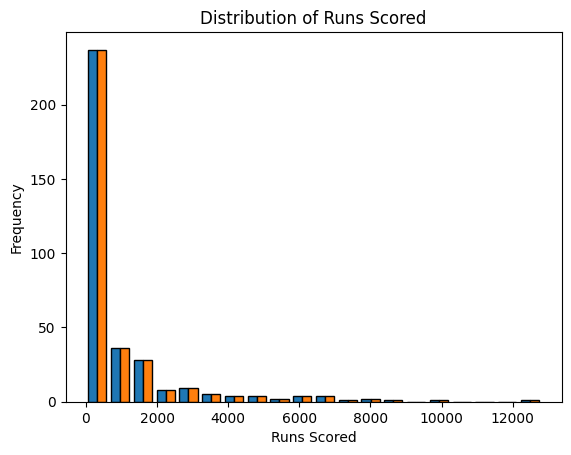

In [374]:
import matplotlib.pyplot as plt

plt.hist(odi_data['runs'], bins=20, edgecolor='k')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.title('Distribution of Runs Scored')
plt.show()

In [375]:
print("Number of data points in 'runs' column:", len(odi_data['runs']))
print("Number of data points in 'strike_rate' column:", len(odi_data['strike_rate']))

Number of data points in 'runs' column: 347
Number of data points in 'strike_rate' column: 347


In [376]:
missing_runs = odi_data['runs'].isnull().sum()
missing_strike_rate = odi_data['strike_rate'].isnull().sum()

print("Missing values in 'runs' column:", missing_runs)
print("Missing values in 'strike_rate' column:", missing_strike_rate)

Missing values in 'runs' column: runs    0
runs    0
dtype: int64
Missing values in 'strike_rate' column: 0


In [377]:
# Check data types of 'runs' and 'strike_rate' columns
print("Data type of 'runs' column:", odi_data['runs'].dtypes)
print("Data type of 'strike_rate' column:", odi_data['strike_rate'].dtypes)

# Check for missing values in 'runs' and 'strike_rate' columns
missing_runs = odi_data['runs'].isnull().sum()
missing_strike_rate = odi_data['strike_rate'].isnull().sum()

print("Number of missing values in 'runs' column:", missing_runs)
print("Number of missing values in 'strike_rate' column:", missing_strike_rate)

Data type of 'runs' column: runs    float64
runs    float64
dtype: object
Data type of 'strike_rate' column: float64
Number of missing values in 'runs' column: runs    0
runs    0
dtype: int64
Number of missing values in 'strike_rate' column: 0


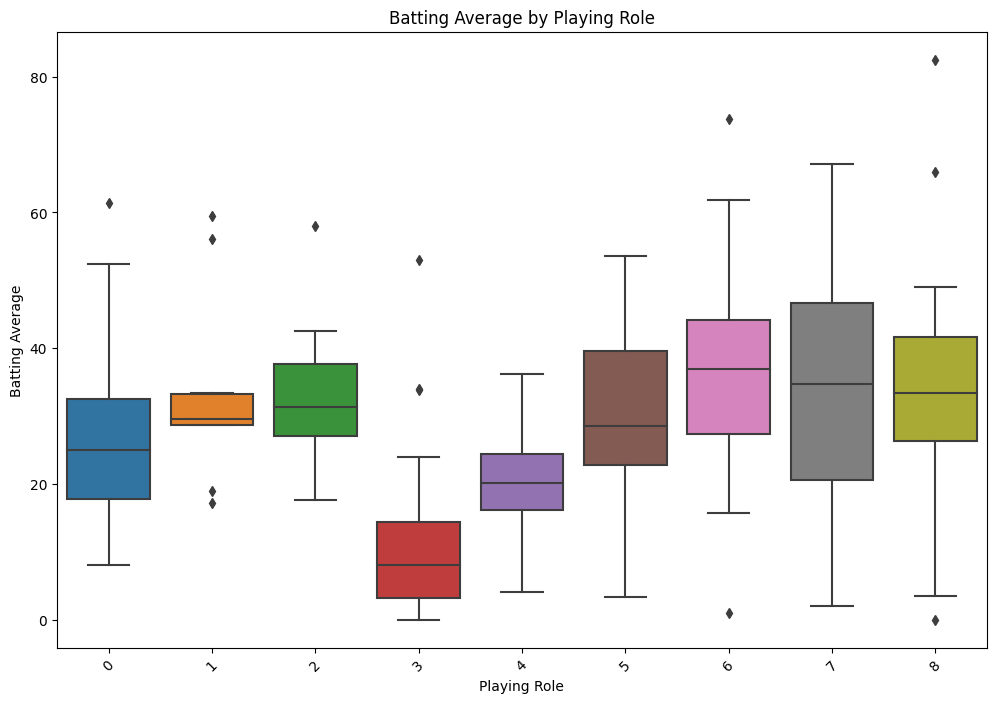

In [378]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=odi_data, x='playing_role', y='average_score')
plt.xticks(rotation=45)
plt.xlabel('Playing Role')
plt.ylabel('Batting Average')
plt.title('Batting Average by Playing Role')
plt.show()

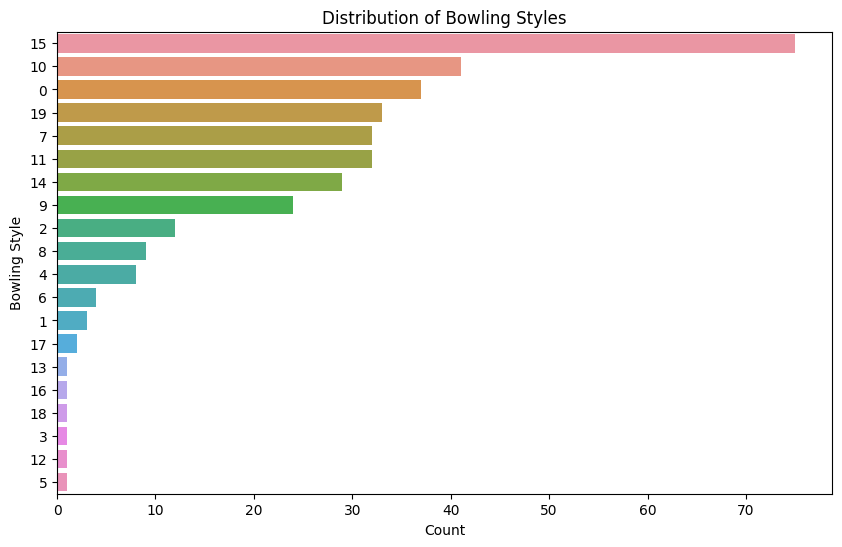

In [379]:
plt.figure(figsize=(10, 6))
sns.countplot(data=odi_data, y='bowling_style', order=odi_data['bowling_style'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Bowling Style')
plt.title('Distribution of Bowling Styles')
plt.show()

In [380]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'bating_style', 'bowling_style', and 'playing_role' are categorical columns
categorical_columns = ['bating_style', 'bowling_style', 'playing_role']

# Initialize LabelEncoders for each categorical column
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    odi_data[column] = label_encoders[column].fit_transform(odi_data[column])

<ipython-input-380-451e7ee17a9d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_data[column] = label_encoders[column].fit_transform(odi_data[column])
<ipython-input-380-451e7ee17a9d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_data[column] = label_encoders[column].fit_transform(odi_data[column])
<ipython-input-380-451e7ee17a9d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [381]:
print(odi_data.dtypes)

name              object
gender             int64
bating_style       int64
bowling_style      int64
playing_role       int64
matches            int64
innings          float64
not_out          float64
runs             float64
high_score       float64
average_score    float64
ball_faced       float64
strike_rate      float64
100s             float64
50               float64
0s               float64
4s               float64
runs             float64
dtype: object


In [382]:
non_numeric_columns = odi_data.select_dtypes(exclude=[np.number]).columns

for column in non_numeric_columns:
    unique_values = odi_data[column].unique()
    print(f"Column '{column}' contains non-numeric values: {unique_values}")

Column 'name' contains non-numeric values: ['Afif Hossain' 'Anamul Haque' 'Ebadot Hossain' 'Hasan Mahmud'
 'Litton Das' 'Mahedi Hasan' 'Mahmudullah' 'Mehidy Hasan Miraz'
 'Mohammad Naim' 'Mohammad Saifuddin' 'Mominul Haque' 'Mosaddek Hossain'
 'Mushfiqur Rahim' 'Mustafizur Rahman' 'Najmul Hossain Shanto'
 'Nasum Ahmed' 'Nurul Hasan' 'Sabbir Rahman' 'Afsar Zazai'
 'Azmatullah Omarzai' 'Fareed Ahmad' 'Fazalhaq Farooqi' 'Gulbadin Naib'
 'Hashmatullah Shahidi' 'Hazratullah Zazai' 'Ibrahim Zadran' 'Ihsanullah'
 'Karim Janat' 'Mohammad Nabi' 'Mujeeb Ur Rahman' 'Najibullah Zadran'
 'Naveen-ul-Haq' 'Noor Ahmad' 'Qais Ahmad' 'Rahmanullah Gurbaz'
 'Rahmat Shah' 'Rashid Khan' 'Samiullah Shinwari' 'Sharafuddin Ashraf'
 'Usman Ghani' 'Yamin Ahmadzai' 'FH Allen' 'TA Blundell' 'TA Boult'
 'DAJ Bracewell' 'MG Bracewell' 'MS Chapman' 'D Cleaver' 'DP Conway'
 'C de Grandhomme' 'JA Duffy' 'LH Ferguson' 'MJ Guptill' 'MJ Henry'
 'KA Jamieson' 'TWM Latham' 'AF Milne' 'DJ Mitchell' 'JDS Neesham'
 'HM Nicholl

In [383]:
# Select non-numeric columns
non_numeric_columns = odi_data.select_dtypes(exclude=[np.number]).columns

# Perform one-hot encoding for non-numeric columns
odi_data_encoded = pd.get_dummies(odi_data, columns=non_numeric_columns)

In [384]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Separate the target variable (runs) from the features
X = odi_data_encoded.drop(columns=['runs'])
y = odi_data_encoded['runs']

In [385]:
columns = odi_data.columns
print(columns)

Index(['name', 'gender', 'bating_style', 'bowling_style', 'playing_role',
       'matches', 'innings', 'not_out', 'runs', 'high_score', 'average_score',
       'ball_faced', 'strike_rate', '100s', '50', '0s', '4s', 'runs'],
      dtype='object')


In [386]:
odi_data

,name,gender,bating_style,bowling_style,playing_role,matches,innings,not_out,runs,high_score,average_score,ball_faced,strike_rate,100s,50,0s,4s,runs
0,Afif Hossain,1,0,15,0,22,19.0,5.0,495.0,93.0,35.35,546.0,90.65,0.0,3.0,2.0,45.0,495.0
1,Anamul Haque,1,1,0,8,44,41.0,0.0,1254.0,120.0,30.58,1691.0,74.15,3.0,5.0,6.0,122.0,1254.0
2,Ebadot Hossain,1,1,10,3,4,3.0,1.0,0.0,0.0,0.00,6.0,0.00,0.0,0.0,2.0,0.0,0.0
3,Hasan Mahmud,1,1,11,3,6,3.0,0.0,1.0,1.0,0.33,11.0,9.09,0.0,0.0,2.0,0.0,1.0
4,Litton Das,1,1,15,8,60,60.0,5.0,1912.0,176.0,34.76,2183.0,87.58,5.0,7.0,7.0,207.0,1912.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,HE van der Dussen,1,1,7,7,41,35.0,10.0,1679.0,134.0,67.16,1859.0,90.31,4.0,11.0,1.0,117.0,1679.0
343,K Verreynne,1,1,15,8,12,10.0,1.0,371.0,95.0,41.22,439.0,84.51,0.0,4.0,0.0,25.0,371.0
344,LB Williams,1,0,14,3,1,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
345,K Zondo,1,1,15,1,6,6.0,1.0,146.0,54.0,29.20,231.0,63.20,0.0,1.0,0.0,8.0,146.0


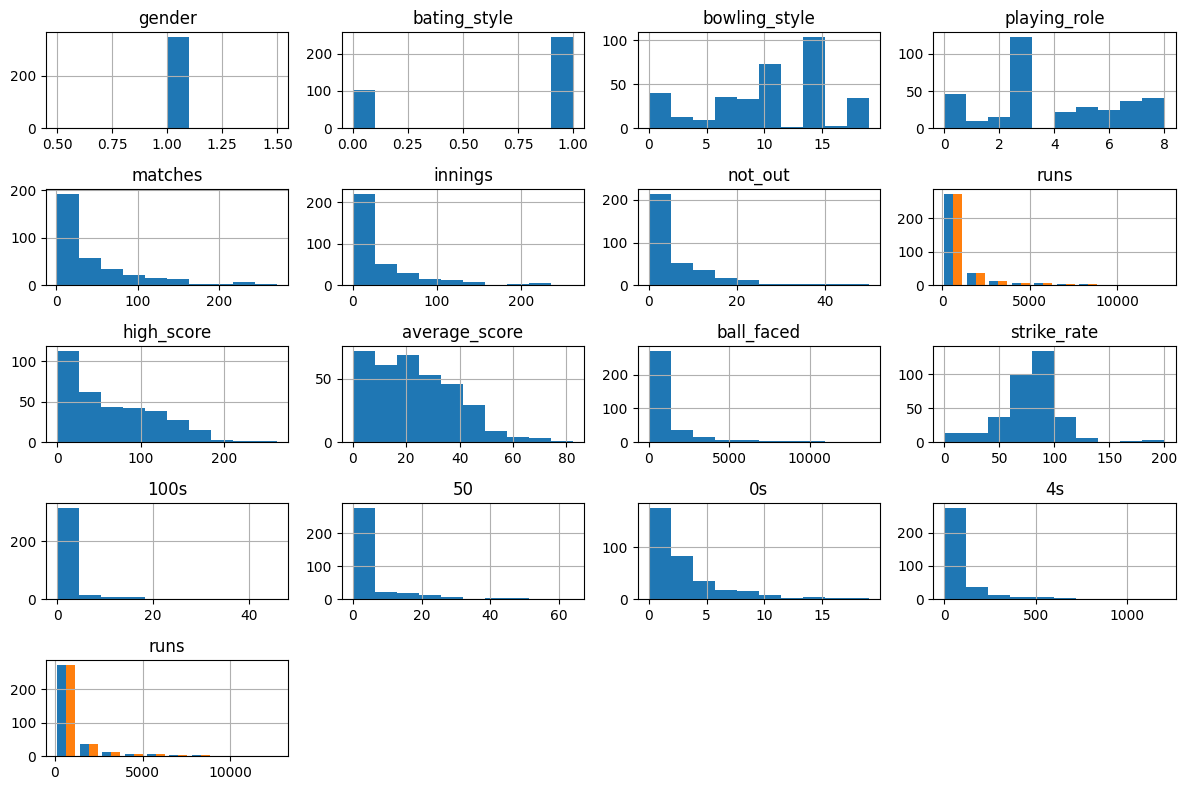

In [408]:
# Create histograms of numerical features
odi_data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [451]:
# Display the cleaned data
print(odi_data.head(10))

                 name  gender  bating_style  bowling_style  playing_role  \
0        Afif Hossain       1             0             15             0   
1        Anamul Haque       1             1              0             8   
2      Ebadot Hossain       1             1             10             3   
3        Hasan Mahmud       1             1             11             3   
4          Litton Das       1             1             15             8   
5        Mahedi Hasan       1             1             15             0   
6         Mahmudullah       1             1             15             0   
7  Mehidy Hasan Miraz       1             1             15             0   
8       Mohammad Naim       1             0              0             6   
9  Mohammad Saifuddin       1             0             14             4   

   matches  innings  not_out    runs  high_score  average_score  ball_faced  \
0       22     19.0      5.0   495.0        93.0          35.35       546.0   
1    

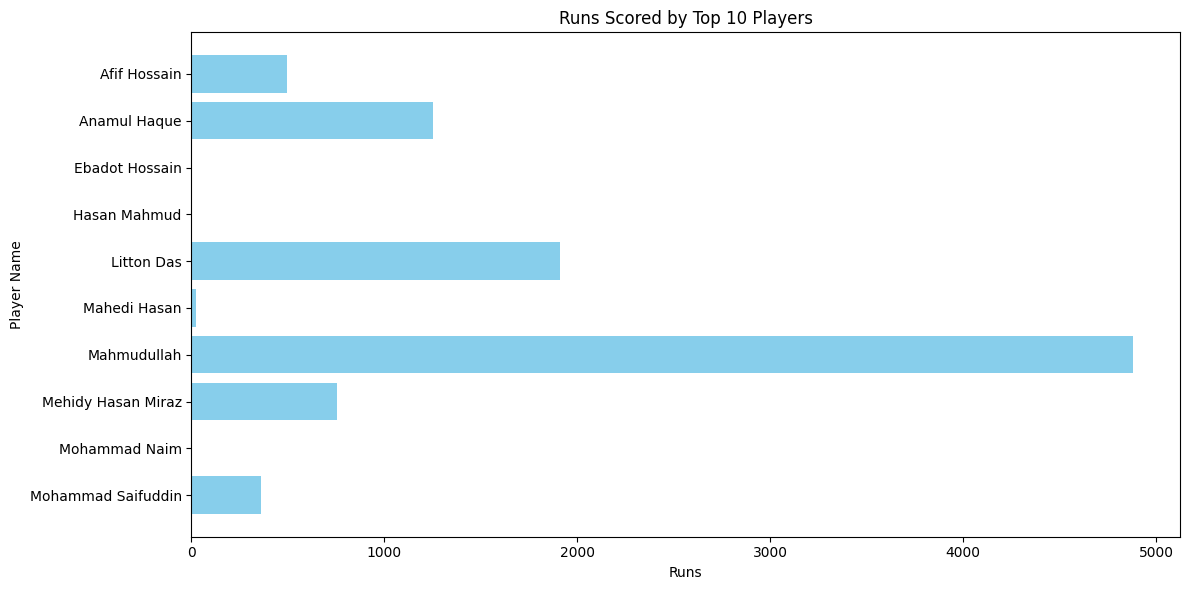

In [462]:
import matplotlib.pyplot as plt

# First 10 rows of data
data = [
    {"name": "Afif Hossain", "runs": 495.0},
    {"name": "Anamul Haque", "runs": 1254.0},
    {"name": "Ebadot Hossain", "runs": 0.0},
    {"name": "Hasan Mahmud", "runs": 1.0},
    {"name": "Litton Das", "runs": 1912.0},
    {"name": "Mahedi Hasan", "runs": 24.0},
    {"name": "Mahmudullah", "runs": 4879.0},
    {"name": "Mehidy Hasan Miraz", "runs": 756.0},
    {"name": "Mohammad Naim", "runs": 1.0},
    {"name": "Mohammad Saifuddin", "runs": 362.0},
]

# Extract names and runs from the data
names = [entry["name"] for entry in data]
runs = [entry["runs"] for entry in data]

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(names, runs, color='skyblue')
plt.xlabel('Runs')
plt.ylabel('Player Name')
plt.title('Runs Scored by Top 10 Players')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest runs at the top
plt.tight_layout()
plt.show()


In [468]:
# Sample data
data = {'bating_style': [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    'bowling_style': [15, 0, 10, 11, 15, 15, 15, 15, 0, 14],
    'playing_role': [0, 8, 3, 3, 8, 0, 0, 0, 6, 4],
    'matches': [22, 44, 4, 6, 60, 3, 215, 67, 2, 29],
    'innings': [19.0, 41.0, 3.0, 3.0, 60.0, 3.0, 187.0, 42.0, 1.0, 19.0],
    'not_out': [5.0, 0.0, 1.0, 0.0, 5.0, 0.0, 50.0, 9.0, 0.0, 9.0],
    'runs': [495.0, 1254.0, 0.0, 1.0, 1912.0, 24.0, 4879.0, 756.0, 1.0, 362.0],
    'high_score': [93.0, 120.0, 0.0, 1.0, 176.0, 14.0, 128.0, 100.0, 1.0, 51.0],
    'average_score': [35.35, 30.58, 0.00, 0.33, 34.76, 8.00, 35.61, 22.90, 1.00, 36.20]
}

In [469]:
# Create a DataFrame
odi_data = pd.DataFrame(data)

# Separate numeric and categorical columns
numeric_columns = odi_data.select_dtypes(include=np.number).columns
categorical_columns = odi_data.select_dtypes(include='object').columns

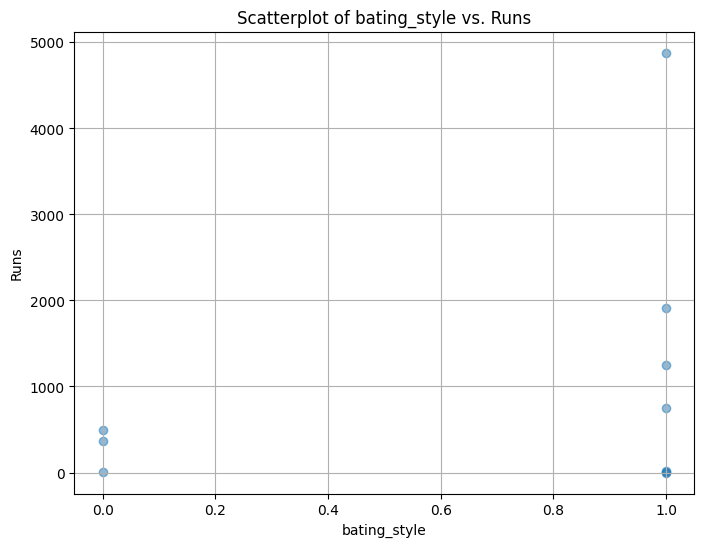

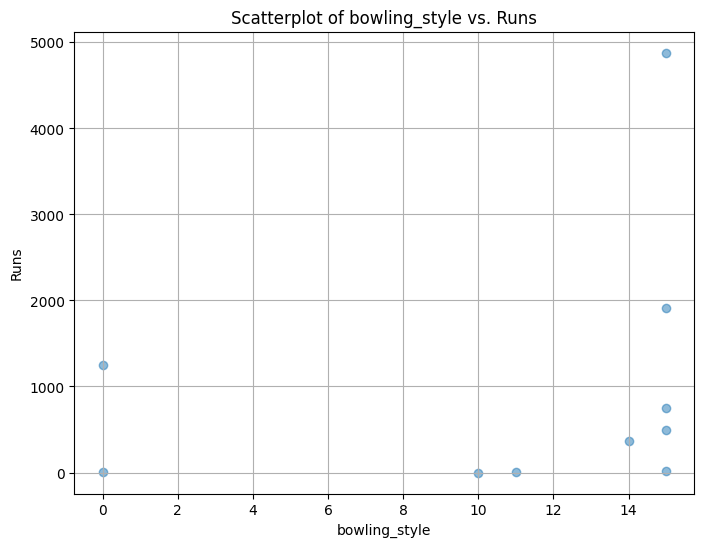

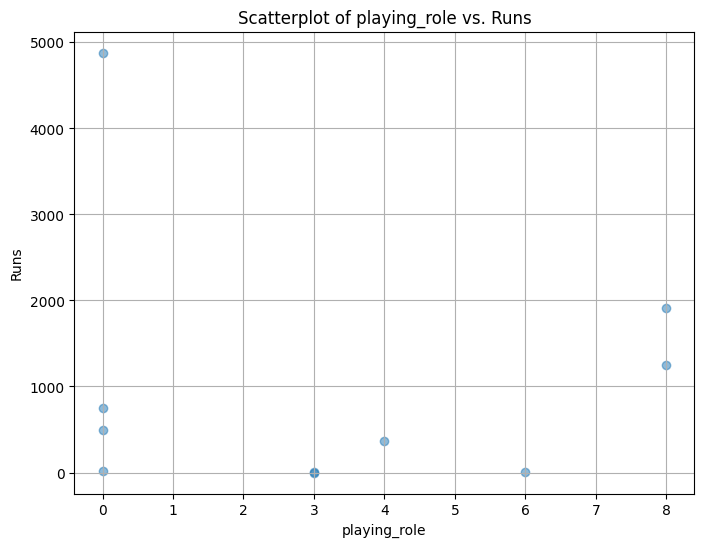

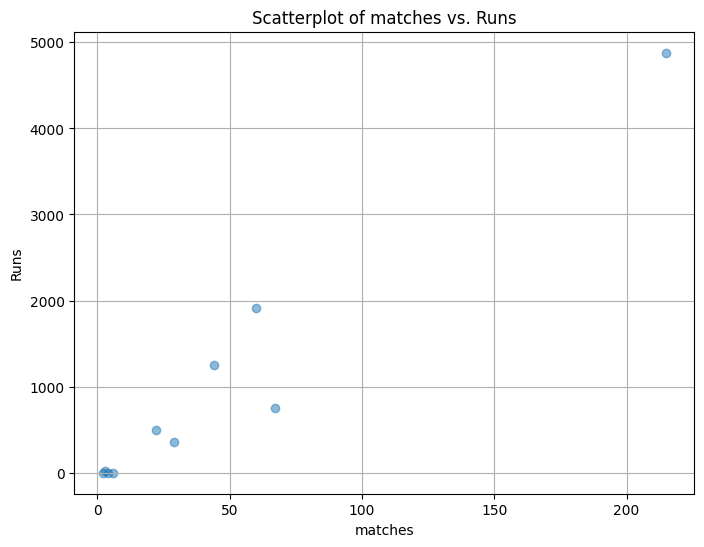

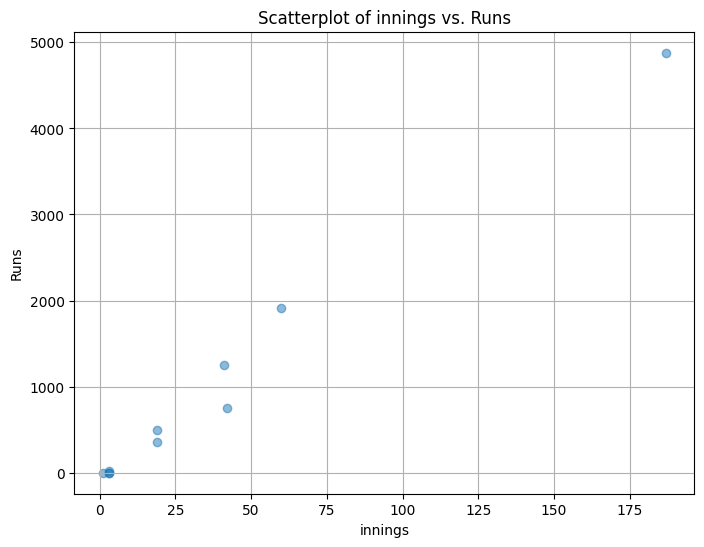

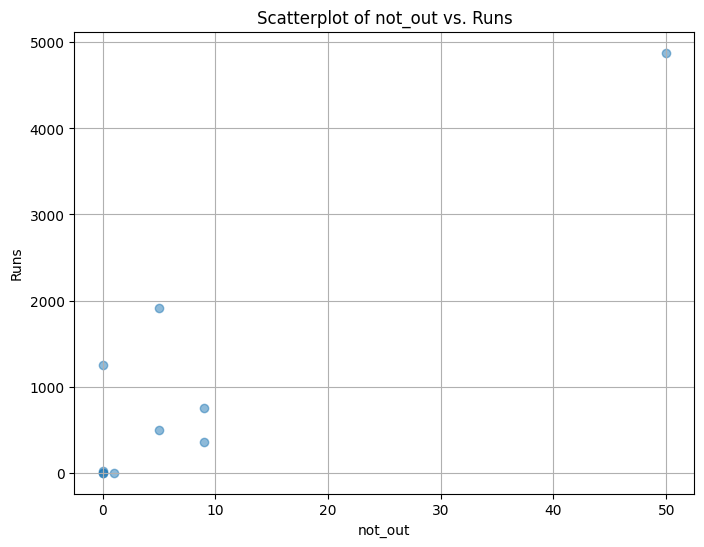

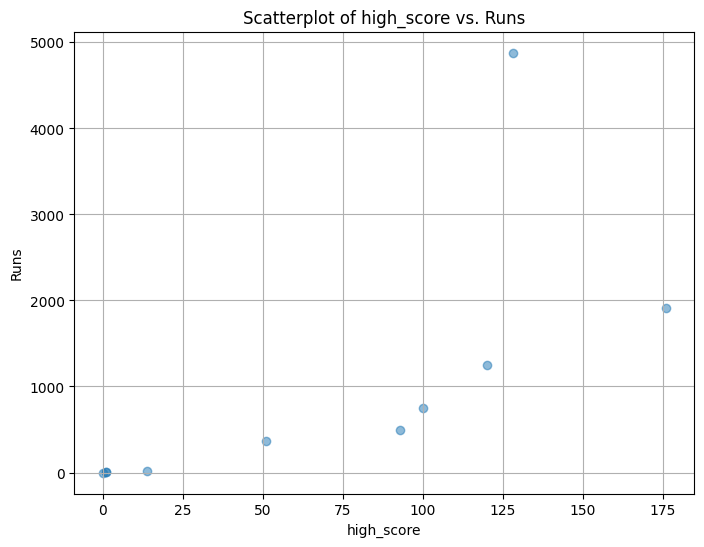

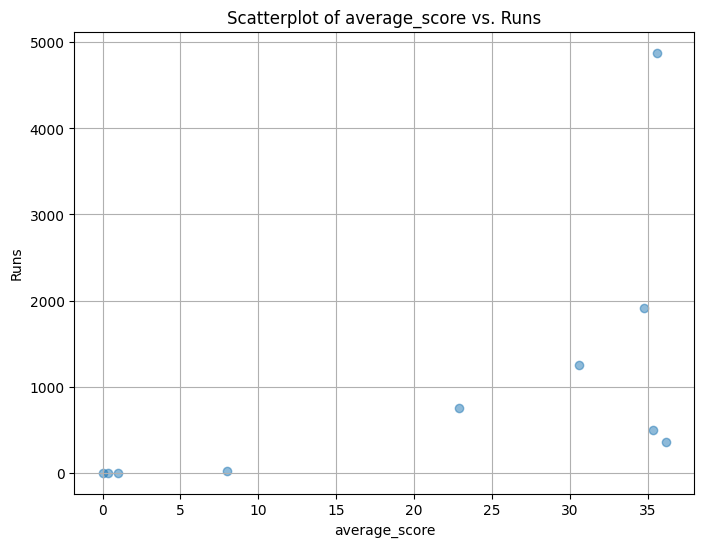

In [470]:
# Create scatter plots for numeric columns among the first 10
for column in odi_data.columns[:10]:
    if column == 'runs':
        continue  # Skip 'runs' column itself
    if column in numeric_columns:
        if odi_data[column].isna().any():
            print(f"Skipping '{column}' due to missing values.")
            continue

        plt.figure(figsize=(8, 6))
        plt.scatter(odi_data[column], odi_data['runs'], alpha=0.5)
        plt.title(f'Scatterplot of {column} vs. Runs')
        plt.xlabel(column)
        plt.ylabel('Runs')
        plt.grid(True)
        plt.show()

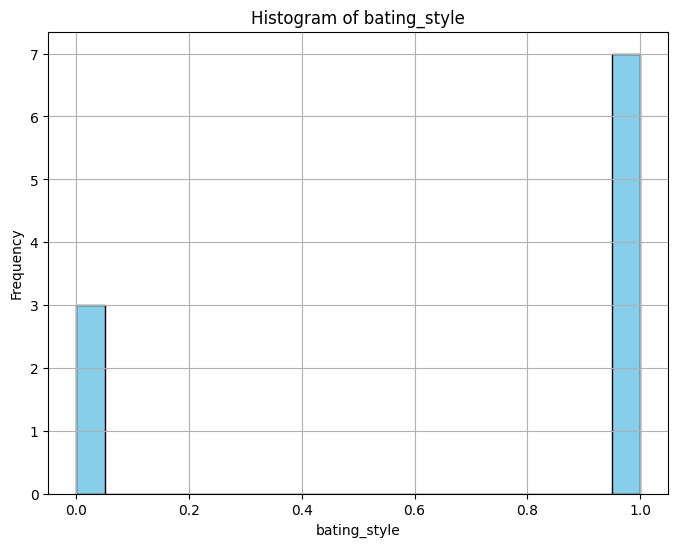

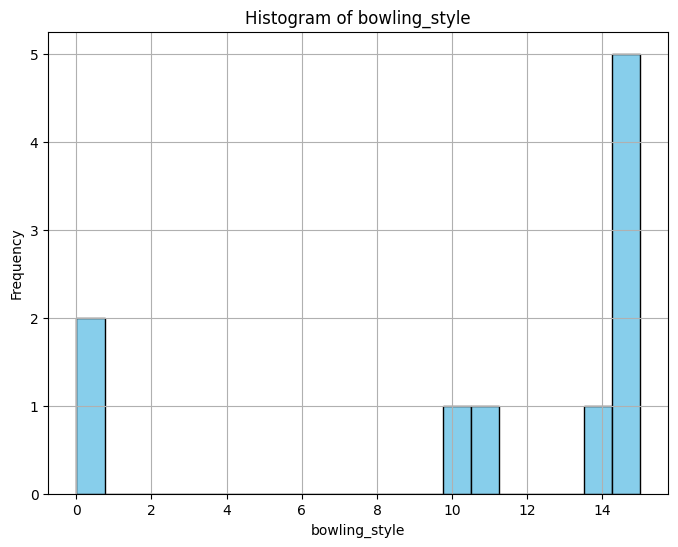

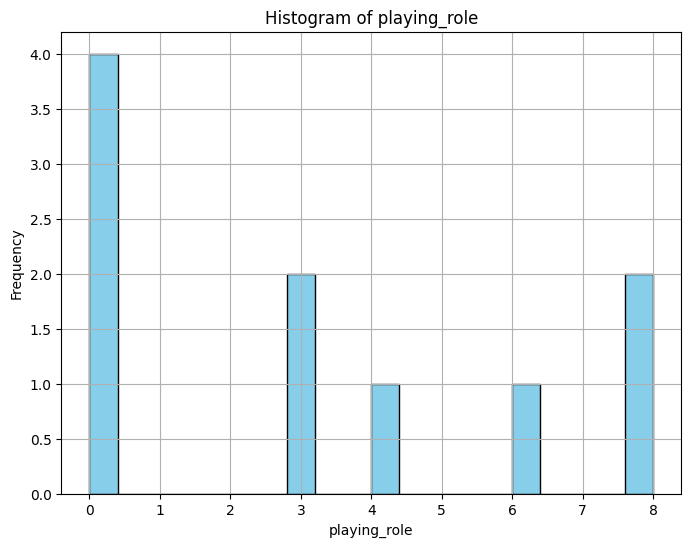

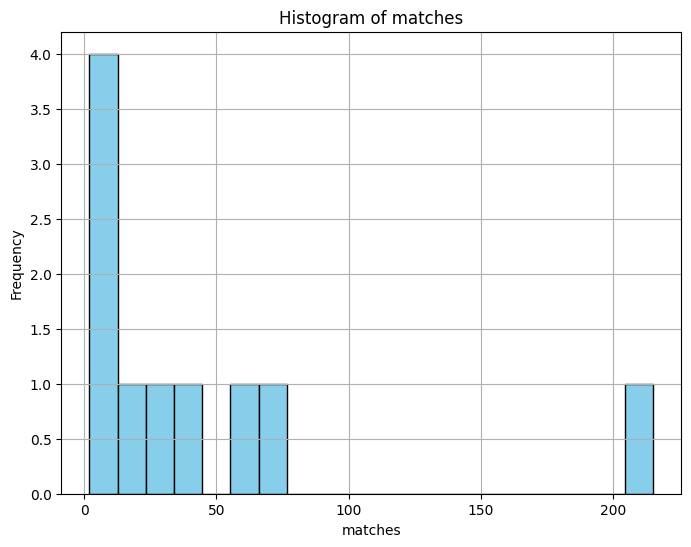

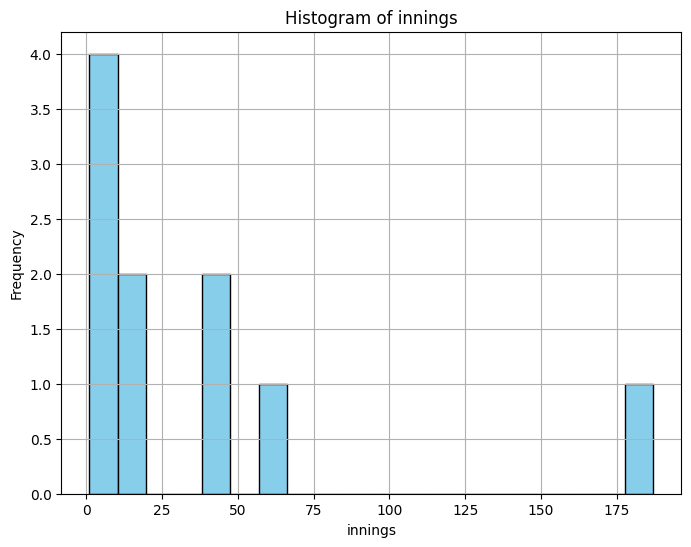

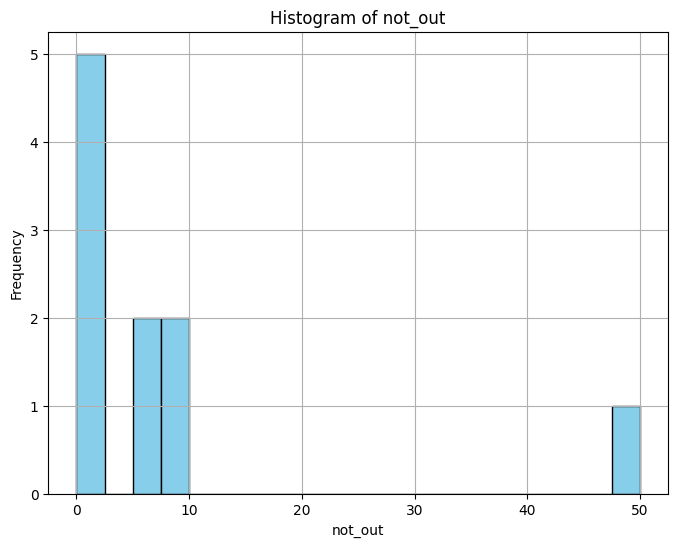

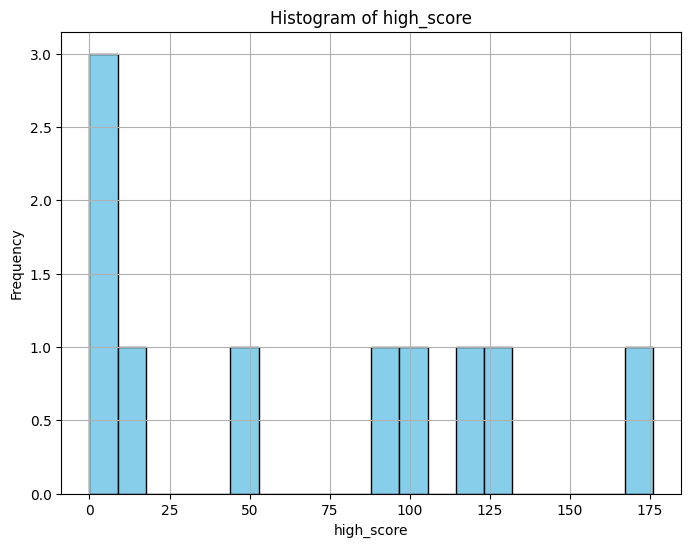

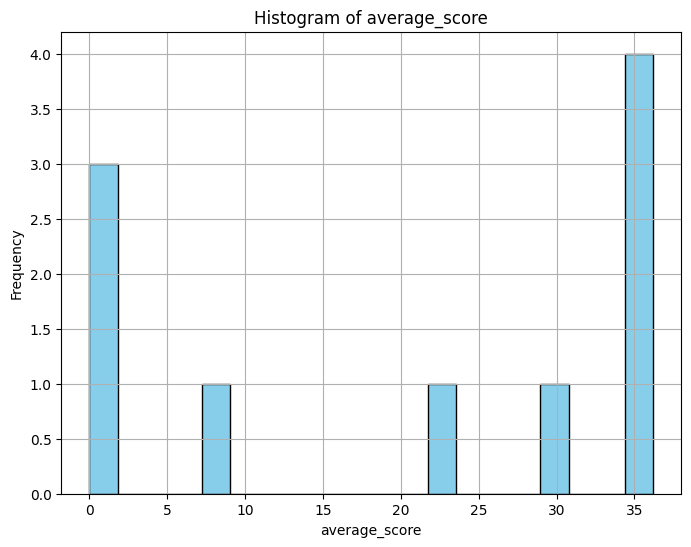

In [471]:
# Specify the numeric columns you want to create histograms for
numeric_columns = odi_data.columns[:10]  # Adjust the columns as needed

# Create histograms for numeric columns
for column in numeric_columns:
    if column == 'runs':
        continue  # Skip 'runs' column itself
    if column in numeric_columns:
        if odi_data[column].isna().any():
            print(f"Skipping '{column}' due to missing values.")
            continue

        plt.figure(figsize=(8, 6))
        plt.hist(odi_data[column], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

In [387]:
# Assuming 'odi_data' is your DataFrame and 'column' is the column you want to plot against 'runs'
# Check for missing values in 'column' and 'runs' columns
missing_values_column = odi_data[column].isna().any()
missing_values_runs = odi_data['runs'].isna().any()

# Check if there are any missing values in either column
if missing_values_column.any() or missing_values_runs.any():
    # If there are missing values, remove rows with missing values in both columns
    odi_data_cleaned = odi_data.dropna(subset=[column, 'runs'])

    # Get the cleaned data for the scatter plot
    x = odi_data_cleaned[column]
    y = odi_data_cleaned['runs']
else:
    # If there are no missing values, use the original data for the scatter plot
    x = odi_data[column]
    y = odi_data['runs']


In [388]:
# Remove rows with any missing values
odi_data.dropna(axis=0, inplace=True)

<ipython-input-388-6ea112c92847>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_data.dropna(axis=0, inplace=True)


In [389]:
# Remove columns with any missing values
odi_data.dropna(axis=1, inplace=True)

<ipython-input-389-9d596d38edd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_data.dropna(axis=1, inplace=True)


In [390]:
# Impute missing values in numeric columns with the mean
odi_data.fillna(odi_data.mean(), inplace=True)

<ipython-input-390-fc4746847272>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  odi_data.fillna(odi_data.mean(), inplace=True)
<ipython-input-390-fc4746847272>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_data.fillna(odi_data.mean(), inplace=True)


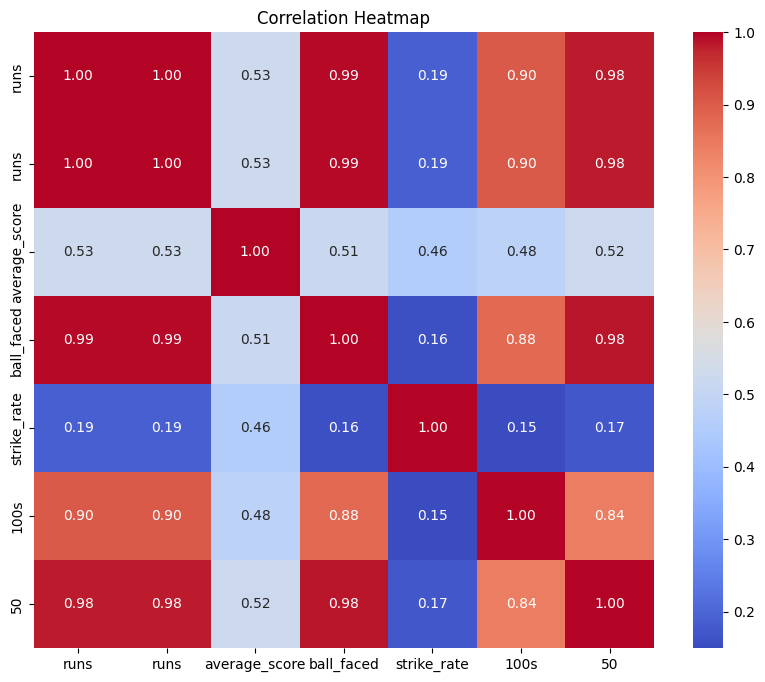

In [416]:
# Compute the correlation matrix
corr_matrix = odi_data[selected_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

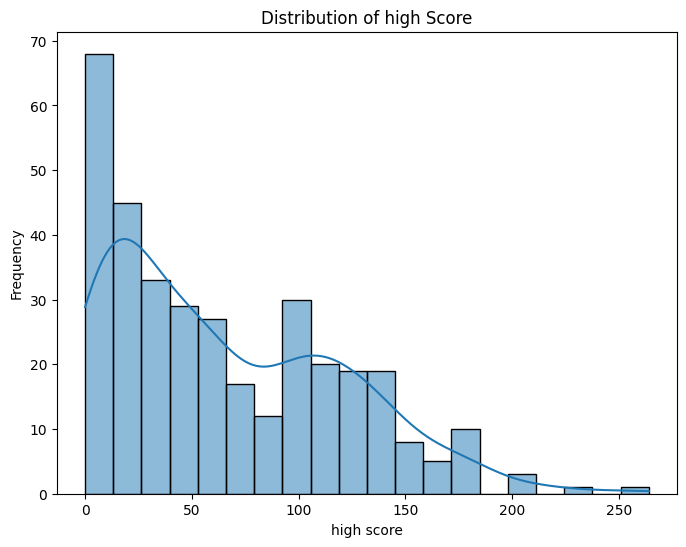

In [392]:
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.histplot(data=odi_data, x='high_score', bins=20, kde=True)
plt.title('Distribution of high Score')
plt.xlabel('high score')
plt.ylabel('Frequency')
plt.show()

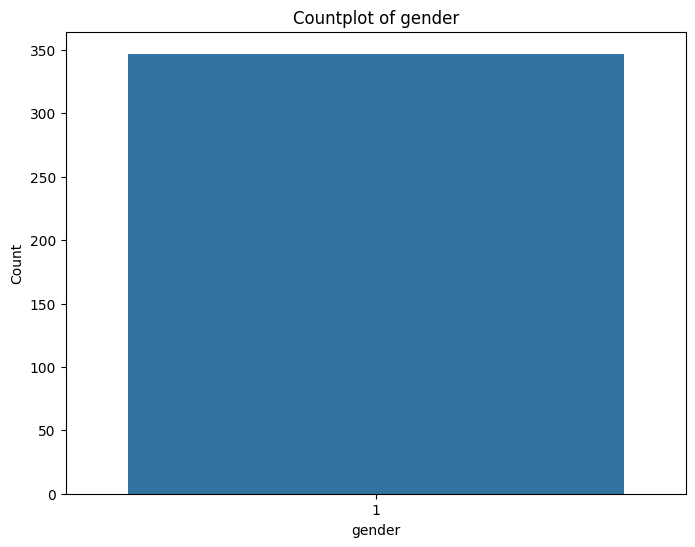

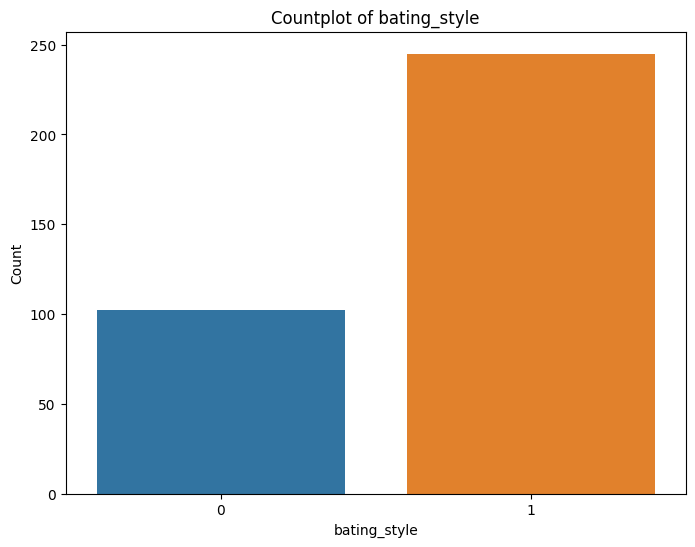

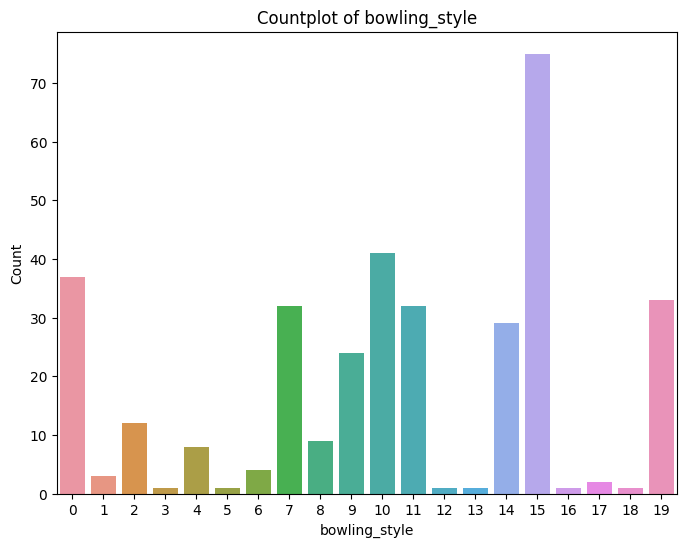

In [393]:
categorical_features = ['gender', 'bating_style', 'bowling_style']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=odi_data, x=feature)
    plt.title(f'Countplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [434]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [435]:
# Split the dataset into a training set and a hold-out validation set (e.g., 80% training, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [436]:
# Create a polynomial regression model
degree = 2  # You can experiment with different degrees
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [437]:
# Fit the model to the training data
polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [438]:
# Make predictions on the test data
y_pred = polyreg.predict(X_valid)

In [439]:
# Evaluate the model on the hold-out validation set
y_pred_valid = polyreg.predict(X_valid)
mse_valid = mean_squared_error(y_valid, y_pred_valid)
mae_valid = mean_absolute_error(y_valid, y_pred_valid)
r2_valid = r2_score(y_valid, y_pred_valid)

In [440]:
# Perform k-fold cross-validation to assess robustness
k = 5  # You can adjust the number of folds as needed
cv_scores = cross_val_score(polyreg, X, y, cv=k, scoring='neg_mean_squared_error')
cv_mse = -cv_scores  # Convert negative scores to positive MSE values

# Calculate the mean and standard deviation of cross-validation MSE scores
mean_cv_mse = np.mean(cv_mse)
std_cv_mse = np.std(cv_mse)

print("\nCross-Validation Results (k-fold):")
print(f"Mean MSE across {k}-folds:", mean_cv_mse)
print(f"Standard Deviation of MSE across {k}-folds:", std_cv_mse)


Cross-Validation Results (k-fold):
Mean MSE across 5-folds: 0.004437166077687455
Standard Deviation of MSE across 5-folds: 0.0009238650628050086


In [441]:
print("Evaluation on Hold-out Validation Set:")
print("Mean Squared Error (MSE):", mse_valid)
print("Mean Absolute Error (MAE):", mae_valid)
print("R-squared (R2):", r2_valid)

Evaluation on Hold-out Validation Set:
Mean Squared Error (MSE): 0.0018404590181190224
Mean Absolute Error (MAE): 0.021023037418036593
R-squared (R2): 0.9999999994764683


In [442]:
print(f'Predicted Runs: {y_pred_valid[0]}')

Predicted Runs: [15.00067196 15.00067196]


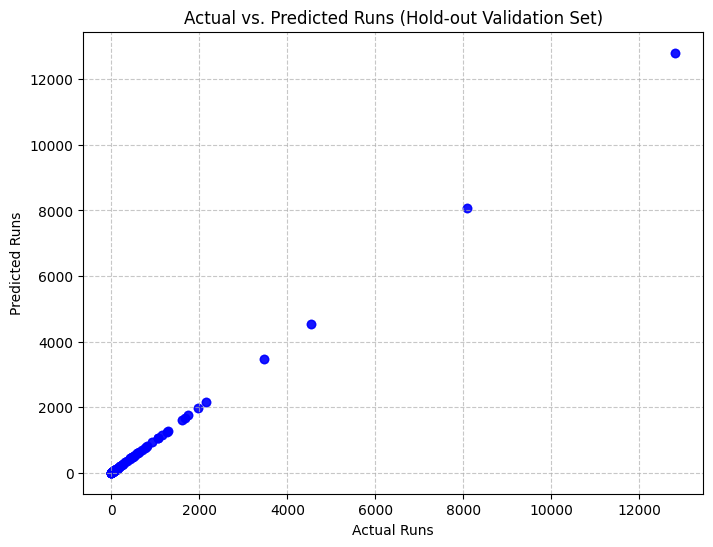

In [443]:
_# Create a scatter plot of actual vs. predicted runs
plt.figure(figsize=(8, 6))
plt.scatter(y_valid, y_pred_valid, c='blue', alpha=0.7)
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs. Predicted Runs (Hold-out Validation Set)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

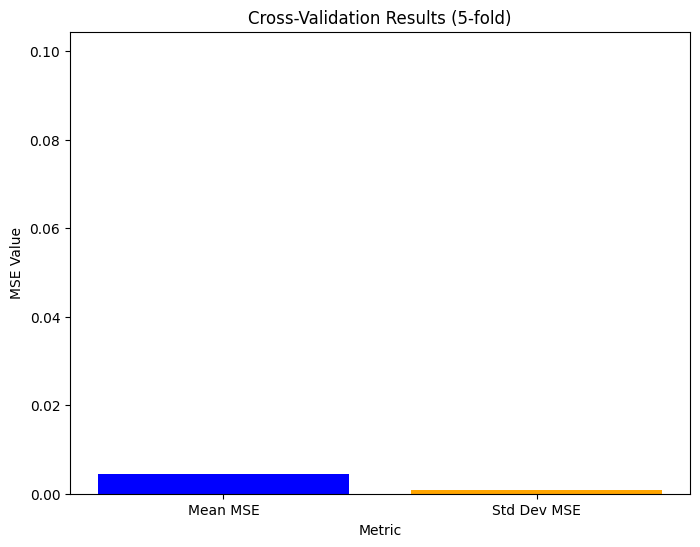

In [444]:
# Create a bar plot to visualize the results
plt.figure(figsize=(8, 6))
plt.bar(['Mean MSE', 'Std Dev MSE'], [mean_cv_mse, std_cv_mse], color=['blue', 'orange'])
plt.xlabel('Metric')
plt.ylabel('MSE Value')
plt.title(f'Cross-Validation Results ({k}-fold)')
plt.ylim(0, max(mean_cv_mse, std_cv_mse) + 0.1)  # Adjust the y-axis limits for better visualization
plt.show()